In [1]:
# Please use the following code to visualize your predictions before submission
# You should have already validated the prediction format using validate_prediction_format.

In [1]:
import sys
sys.path.append('..')
from util.dataset_util import read_video, read_cam_params, project_3d_to_2d, plot_over_image, load_data

In [2]:
data_template_path = '/Users/andreaongaro/Documents/Documenti Andrea Ongaro/Magistrale/Torino/Corsi/2_ANNO/ComputerVision/Project/lcn-pose/dataset/chi3d/template.json' # template file
data_pred_path = '/Users/andreaongaro/Documents/Documenti Andrea Ongaro/Magistrale/Torino/Corsi/2_ANNO/ComputerVision/Project/lcn-pose/dataset/chi3d/template.json'  # prediction file to be submitted; replace this with your prediction

In [3]:
dataset_path = '/Users/andreaongaro/Documents/Documenti Andrea Ongaro/Magistrale/Torino/Corsi/2_ANNO/ComputerVision/Project/lcn-pose/dataset/chi3d/' # path to the dataset
subset = 'test'
subj_name = 's01'
action_name = 'Grab 10'
person_id = 0 # 0 or 1 in chi3d, which requires 2 person predictions and 0 in humansc3d and fit3d

In [4]:
data = load_data(data_pred_path)
vid_path = dataset_path + subset + "/" + subj_name + "/videos/" + action_name + '.mp4'
video = read_video(vid_path)
cam_path = dataset_path + subset + "/" + subj_name + "/camera_parameters/" + action_name + '.json'
cam_params = read_cam_params(cam_path)
frame_id = data[subj_name][action_name]['other']['contact_fr_id']
frame_id = data[subj_name][action_name]['other']['video_fr_ids'][0] if frame_id is None else frame_id
image_id = data[subj_name][action_name]['other']['video_fr_ids'].index(frame_id)
frame = video[frame_id]

j3d [[ 3.52619156e-03  3.43315105e-01  2.94449079e+00]
 [ 1.46143020e-01  3.53694858e-01  2.95484528e+00]
 [ 1.24761469e-01  7.92367728e-01  2.93357774e+00]
 [ 1.27210760e-01  1.19851080e+00  2.97856487e+00]
 [-1.43200922e-01  3.36773908e-01  2.92897942e+00]
 [-1.17600697e-01  7.82750581e-01  2.93376580e+00]
 [-1.41889331e-01  1.18796758e+00  2.97762066e+00]
 [-1.20737851e-03  9.93436529e-02  2.96563903e+00]
 [-1.57247362e-03 -1.39227138e-01  2.98267193e+00]
 [ 6.90172399e-03 -2.31692372e-01  2.89354197e+00]
 [ 1.90650565e-03 -3.35285878e-01  2.93702699e+00]
 [ 1.48987387e-01 -8.50360491e-02  2.98808406e+00]
 [ 3.23853653e-01  1.51476928e-01  2.96362208e+00]
 [ 4.22074383e-01  3.69111976e-01  2.96139808e+00]
 [-1.51271818e-01 -8.25229519e-02  2.98264904e+00]
 [-3.17902325e-01  1.49487817e-01  2.96563959e+00]
 [-4.09001326e-01  3.73196162e-01  2.94706267e+00]]
j2d [[483.38368032 589.39920508]
 [537.99262271 592.83436469]
 [529.85436458 759.09673037]
 [529.75790348 900.60684707]
 [426.73

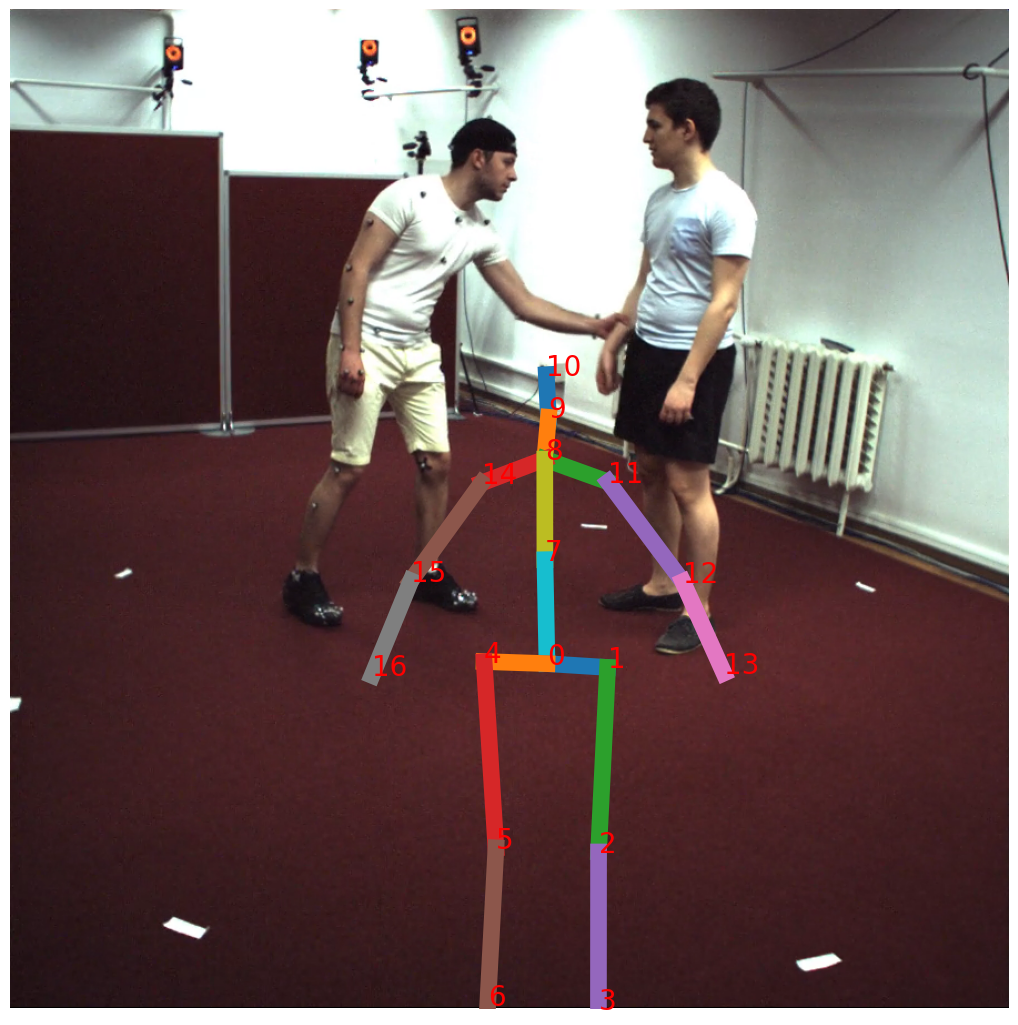

In [6]:
j3d = data[subj_name][action_name]['persons'][person_id]['joints3d']['joints3d'][image_id]
print("j3d", j3d)
j2d = project_3d_to_2d(j3d, cam_params['intrinsics_w_distortion'], 'w_distortion')
print("j2d", j2d)
plot_over_image(frame, j2d)